In [31]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
import random
import pickle
import cv2 
import os

In [2]:
path_to_parsed_dataset = 'parsed_dataset'

In [4]:
files = list(os.walk(path_to_parsed_dataset))

In [9]:
train_folder, validation_folder, test_folder = files[1:4]

In [98]:
IM_SIZE = 512


def read_image(folder,  key):
    image = cv2.imread(os.path.join(folder, key + '.jpg'))
    original_width = image.shape[1]
    original_height = image.shape[0]
    
    image = cv2.resize(image, (IM_SIZE, IM_SIZE))
    
    f = open(os.path.join(folder, key + '.xml'), 'r')
    data = f.read()
    f.close()
    
    extracted_contours = []

    for i in data.split('<contour>')[1:]:
        extracted_contours.append([( int(a.split('"')[1]), int(a.split('"')[3])) for a in i.split('</contour>')[0].split('point')[1:]])
    
    extracted_countours_np = np.array(extracted_contours)
    
    extracted_countours_np[:,:,0] = extracted_countours_np[:,:,0] / original_width * IM_SIZE
    extracted_countours_np[:,:,1] = extracted_countours_np[:,:,1] / original_height * IM_SIZE
    
    return image, extracted_countours_np

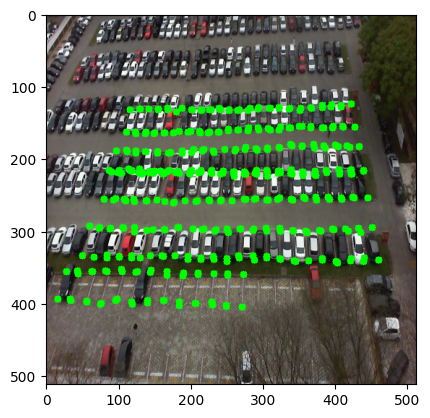

In [99]:
test_image, xml_data = read_image(train_folder[0], train_folder[2][2].split('.')[0] )

for contour in xml_data:
    for p in contour:
        cv2.circle(test_image, p, 5, (0,255,0), -1)

plt.imshow(test_image[:, :, ::-1])
plt.show()